# Diode with Pyspice

some good address:
http://www.ece.mcgill.ca/~grober4/SPICE/SPICE_Decks/1st_Edition/chapter3/Chapter%203%20%20Diodes%20web%20version.html



In [8]:
import numpy as np

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit


circuit = Circuit('First Example Define diode')

## Example 1
circuit.D('1','3', circuit.gnd, model='Diode')
circuit.model('Diode', 'D', IS=0.0000000001, rs=0.0341512, nd=2, eg=1.05743, xti=5, bv=1000, ibv=5e-08, cjo=10, vj=0.7, m=0.5, fc=0.5, tt=1e-07, kf=0, af=1)


<class 'PySpice.Spice.Netlist.DeviceModel'> Diode

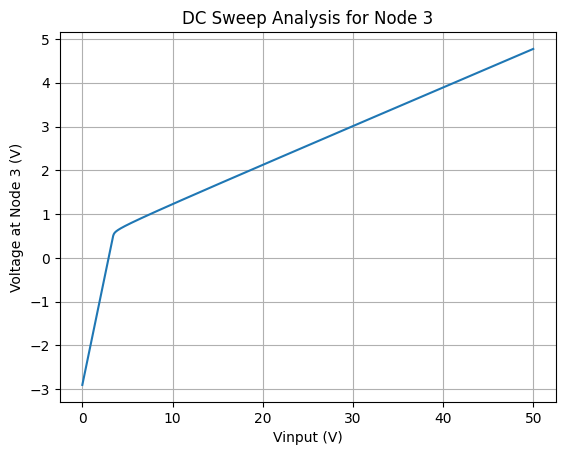

In [31]:
import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit


circuit = Circuit('First Example Define diode')

## Example 1
circuit.D('1','3', circuit.gnd, model='Diode')
circuit.model('Diode', 'D', IS=0.0000000001, rs=0.0341512, nd=2, eg=1.05743, xti=5, bv=1000, ibv=5e-08, cjo=10, vj=0.7, m=0.5, fc=0.5, tt=1e-07, kf=0, af=1)

circuit.V('input', '1', circuit.gnd, 5)
circuit.R('s', '2', '3', .356)
circuit.R('sh', '3', circuit.gnd, 312.55)
circuit.I('pv','3', circuit.gnd, 8.17)
circuit.V('meas', '1','2', 0 )
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vinput = slice(0, 50, 0.01))
waveform = analysis.nodes['3']

voltage_values = np.array(waveform)
sweep_values = np.linspace(0, 50, len(voltage_values))

plt.xlabel('Vinput (V)')
plt.ylabel('Voltage at Node 3 (V)')
plt.title('DC Sweep Analysis for Node 3')
plt.grid(True)
plt.plot(sweep_values , waveform)
plt.show()



![Example_Code_1_Figure](../Circuit_Electronics/CircuitElectronicsImages/ExampleCode_1.PNG)

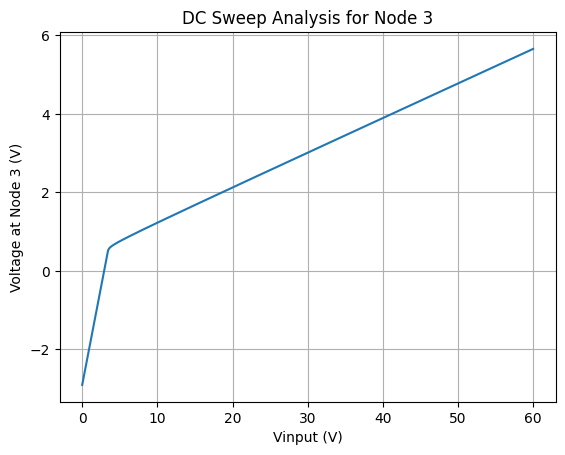

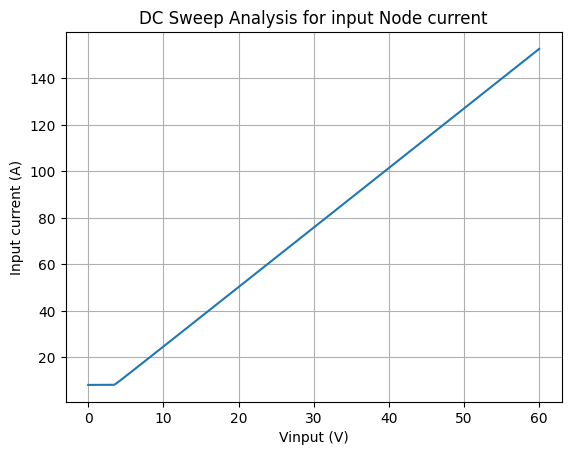

{'2': WaveForm 2 [0.000e+00 1.000e-02 2.000e-02 ... 5.998e+01 5.999e+01 6.000e+01]@V, '1': WaveForm 1 [0.000e+00 1.000e-02 2.000e-02 ... 5.998e+01 5.999e+01 6.000e+01]@V, '3': WaveForm 3 [-2.90521091 -2.89522229 -2.88523367 ...  5.65147621  5.65235561
  5.65323501]@V, 'v-sweep': WaveForm v-sweep [0.000e+00 1.000e-02 2.000e-02 ... 5.998e+01 5.999e+01 6.000e+01]@V}


In [18]:
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import #

# Define sweep parameters
Vinput_start = 0
Vinput_stop = 60
Vinput_step = 0.01

# Define the circuit
circuit = Circuit('First Example Define diode')

# Add a diode with specific parameters
circuit.D('1', '3', circuit.gnd, model='Diode')
circuit.model('Diode', 'D', IS=0.0000000001, rs=0.0341512, nd=2, eg=1.05743, xti=5, bv=1000, ibv=5e-08, cjo=10, vj=0.7, m=0.5, fc=0.5, tt=1e-07, kf=0, af=1)

# Add voltage source, resistors, and current source
circuit.V('input', '1', circuit.gnd, 5)
circuit.R('s', '2', '3', 0.356)
circuit.R('sh', '3', circuit.gnd, 312.55)
circuit.I('pv', '3', circuit.gnd, 8.17)
circuit.V('meas', '1', '2', 0)

# Create a simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Perform a DC sweep analysis
analysis = simulator.dc(Vinput=slice(Vinput_start, Vinput_stop, Vinput_step))

# Extract the data for node '3'
waveform = analysis['3']
sweep_values1=analysis['v-sweep']
InputCurrentMeasurement=analysis['vmeas']
# Assuming waveform.data provides the voltage values for node '3'
voltage_values = np.array(waveform)


# Plot the results
plt.plot(sweep_values1, voltage_values)
plt.xlabel('Vinput (V)')
plt.ylabel('Voltage at Node 3 (V)')
plt.title('DC Sweep Analysis for Node 3')
plt.grid(True)
plt.show()

plt.plot(sweep_values1,InputCurrentMeasurement)
plt.xlabel('Vinput (V)')
plt.ylabel('Input current (A)')
plt.title('DC Sweep Analysis for input Node current')
plt.grid(True)
plt.show()

print(analysis.nodes)

## I-V Charactristic of diode

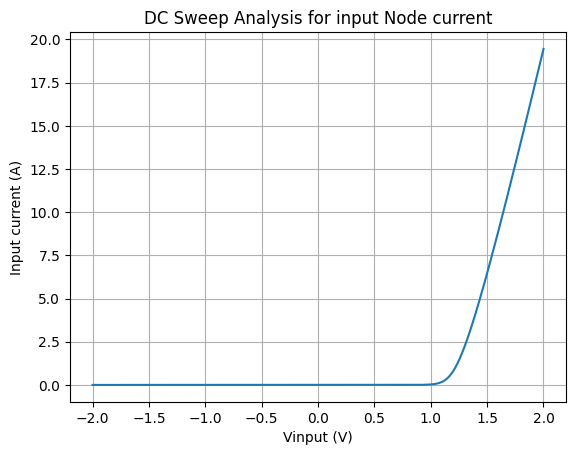

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import #

# Define sweep parameters
Vinput_start = -2
Vinput_stop = 2
Vinput_step = 0.001

# Define the circuit
circuit = Circuit('First Example Define diode')

# Add a diode with specific parameters
circuit.D('1', '2', circuit.gnd, model='Diode')
circuit.model('Diode', 'D', IS=0.0000000001, rs=0.0341512, N=2, 
              eg=1.05743, xti=5, bv=1000, ibv=5e-08, cjo=10, vj=0.7,
                m=0.5, fc=0.5, tt=1e-07, kf=0, af=1)

circuit.V('input', '1', circuit.gnd, 5)
circuit.V('meas', '1', '2', 0)
# Create a simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Perform a DC sweep analysis
analysis = simulator.dc(Vinput=slice(Vinput_start, Vinput_stop, Vinput_step))

waveform = analysis['2']
sweep_values1=analysis['v-sweep']
InputCurrentMeasurement=analysis['vmeas']
# Assuming waveform.data provides the voltage values for node '3'
voltage_values = np.array(waveform)

plt.plot(voltage_values,InputCurrentMeasurement)
plt.xlabel('Vinput (V)')
plt.ylabel('Input current (A)')
plt.title('DC Sweep Analysis for input Node current')
plt.grid(True)
plt.show()


## Diode=1n4148

Include breakdown voltage and forward region

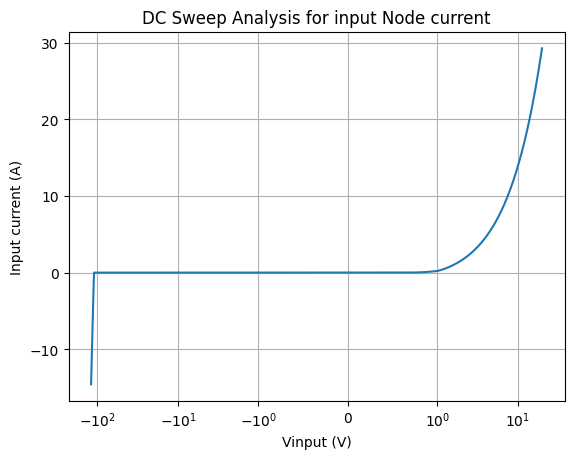

In [54]:
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import #

# Define sweep parameters
Vinput_start = -120
Vinput_stop = 20
Vinput_step = 0.001

# Define the circuit
circuit = Circuit('First Example Define diode')

# Add a diode with specific parameters
circuit.D('1', '2', circuit.gnd, model='Diode')

circuit.model('Diode', 'D', IS=4.352E-9, BV = 110, GMIN = 1E-12,
               N=1.906, IBV = 0.0001, RS = 0.6458,
                 CJO = 7.048E-13, VJ = 0.869, M = 0.03, FC = 0.5 , TT = 3.48E-9 
                   )

circuit.V('input', '1', circuit.gnd, 5)
circuit.V('meas', '1', '2', 0)
# Create a simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Perform a DC sweep analysis
analysis = simulator.dc(Vinput=slice(Vinput_start, Vinput_stop, Vinput_step))

waveform = analysis['2']
sweep_values1=analysis['v-sweep']
InputCurrentMeasurement=analysis['vmeas']
# Assuming waveform.data provides the voltage values for node '3'
voltage_values = np.array(waveform)

plt.xscale('symlog', linthresh=1)

plt.plot(voltage_values,InputCurrentMeasurement)
plt.xlabel('Vinput (V)')
plt.ylabel('Input current (A)')
plt.title('DC Sweep Analysis for input Node current')
plt.grid(True)
plt.show()


## AC Small Signal Spice Model

![AC Small Signal Spice Model](../Circuit_Electronics/CircuitElectronicsImages/Example_SmallSignalDiodeModel1.PNG)

![IV_Char_Real_Ideal_Spice](../Circuit_Electronics/CircuitElectronicsImages/IV_DiodeCharactristice_Real_Spice_Ideal.png)


### General code for checking DC sweep of BJT Transistor

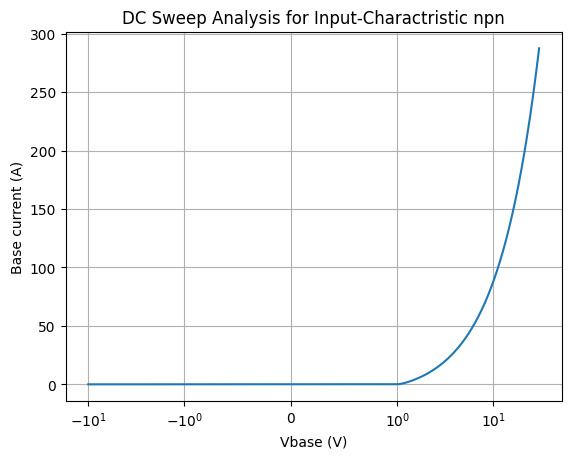

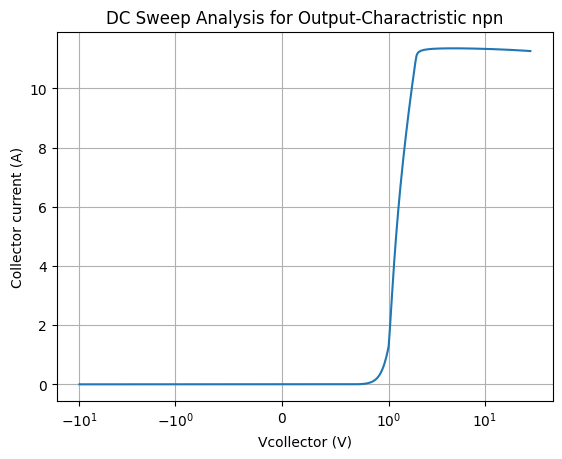

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import #

# Define sweep parameters
Vinput_start = -10
Vinput_stop = 30
Vinput_step = 0.001

# Define the circuit
circuit = Circuit('IV_2n2222')

circuit.BJT('1', 'collector', 'base', circuit.gnd, model='2n2222a')

# .MODEL 2n2222a npn
circuit.model('2n2222a', 'BJT', IS=3.88184e-14, BF=929.846, NF=1.10496, VAF=16.5003,
IKF=0.019539, ISE=1.0168e-11, NE=1.94752, BR=48.4545,
NR=1.07004, VAR=40.538, IKR=0.19539, ISC=1.0168e-11,
NC=4, RB=0.1, IRB=0.1, RBM=0.1,
RE=0.0001, RC=0.426673, XTB=0.1, XTI=1,
EG=1.05, CJE=2.23677e-11, VJE=0.582701, MJE=0.63466,
TF=4.06711e-10, XTF=3.92912, VTF=17712.6, ITF=0.4334,
CJC=2.23943e-11, VJC=0.576146, MJC=0.632796, XCJC=1,
FC=0.170253, CJS=0, VJS=0.75, MJS=0.5,
TR=1e-07, PTF=0, KF=0, AF=1
                   )


circuit.V('input', '1', circuit.gnd, 5)
circuit.V('measin', '1', 'base', 0)
circuit.V('output', '3', circuit.gnd, 5)
circuit.V('measout', '3', 'collector', 0)

# Create a simulator
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Perform a DC sweep analysis
analysis = simulator.dc(Vinput=slice(Vinput_start, Vinput_stop, Vinput_step))
analysis1 = simulator.dc(Voutput=slice(Vinput_start, Vinput_stop, Vinput_step))


waveform = analysis['base']
waveform1 = analysis1['collector']
#sweep_values=analysis['v-sweep']
InputCurrentMeasurement=analysis['vmeasin']
InputCurrentMeasurement1=analysis['vmeasout']


# Assuming waveform.data provides the voltage values for node '3'
voltage_values_base = np.array(waveform)
voltage_values_collector = np.array(waveform1)

plt.xscale('symlog', linthresh=1)
plt.plot(voltage_values_base,InputCurrentMeasurement)
plt.xlabel('Vbase (V)')
plt.ylabel('Base current (A)')
plt.title('DC Sweep Analysis for Input-Charactristic npn')
plt.grid(True)
plt.show()

plt.xscale('symlog', linthresh=1)
plt.plot(voltage_values_collector,InputCurrentMeasurement1)
plt.xlabel('Vcollector (V)')
plt.ylabel('Collector current (A)')
plt.title('DC Sweep Analysis for Output-Charactristic npn')
plt.grid(True)
plt.show()




### Electronic Laboratory: BJT Saturation Region

To obtain the saturation region, we need to bias the input diode (BE) at voltages below 0.6V and use a small VCE.

First, let's determine how to obtain the output characteristics of a transistor. Follow these steps:

- ##Set Up the Circuit:## Configure your transistor circuit with the base, collector, and emitter. Ensure you have a method to vary the base current.

- ##Perform DC Analysis:## For each base current, conduct a DC analysis by sweeping the collector voltage and recording the collector current.

- ##Save and Plot Results:## Save the results for each base current and plot the collector current versus collector voltage.

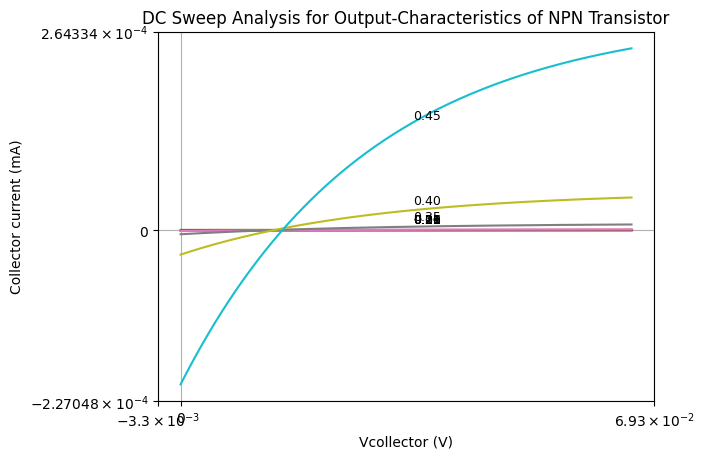

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import #




circuit = Circuit('IV_2n2222')

circuit.BJT('1', 'collector', 'base', circuit.gnd, model='2n2222a')

# .MODEL 2n2222a npn
circuit.model('2n2222a', 'BJT', IS=3.88184e-14, BF=929.846, NF=1.10496, VAF=16.5003,
IKF=0.019539, ISE=1.0168e-11, NE=1.94752, BR=48.4545,
NR=1.07004, VAR=40.538, IKR=0.19539, ISC=1.0168e-11,
NC=4, RB=0.1, IRB=0.1, RBM=0.1,
RE=0.0001, RC=0.426673, XTB=0.1, XTI=1,
EG=1.05, CJE=2.23677e-11, VJE=0.582701, MJE=0.63466,
TF=4.06711e-10, XTF=3.92912, VTF=17712.6, ITF=0.4334,
CJC=2.23943e-11, VJC=0.576146, MJC=0.632796, XCJC=1,
FC=0.170253, CJS=0, VJS=0.75, MJS=0.5,
TR=1e-07, PTF=0, KF=0, AF=1
                   )

# Define sweep parameters
VAF=16.5003
Vinput_start = 0.0
Vinput_stop = VAF#0.004
Vinput_step = 0.0001


circuit.V('measin', '1', 'base', 0)
circuit.V('output', '3', circuit.gnd, 5)
circuit.V('measout', '3', 'collector', 0)
Vbase=circuit.V('input', '1', circuit.gnd, 0.45)


# Base voltage values to iterate through
# Generate base voltages with exponential steps for the first part and linear steps for the second part
# exp_start = 0.01
# exp_stop = 0.41
lin_start = 0.01
lin_stop = 0.45

# Number of steps
#exp_steps = 20
lin_steps = 10

# Exponential part
#exp_base_voltages = np.geomspace(exp_start, exp_stop, num=exp_steps)

# Linear part
lin_base_voltages = np.linspace(lin_start, lin_stop, num=lin_steps)

# Combine both parts
#base_voltages = np.concatenate((exp_base_voltages, lin_base_voltages))
base_voltages = lin_base_voltages


#base_voltages = np.linspace(0.1, 0.5, num=20)  # Adjust 'num' as needed

# Store results for plotting
collector_voltages = []
collector_currents = []
labels = []

# Loop through base voltage values
for Vbase_value in base_voltages:
    Vbase.dc_value = Vbase_value
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.dc(Voutput=slice(Vinput_start, Vinput_stop, Vinput_step))
    waveform = analysis['collector']
    InputCurrentMeasurement = analysis['vmeasout']
    
    # Store results
    collector_voltages.append(np.array(waveform))
    collector_currents.append(InputCurrentMeasurement # 1000)  # Convert to mA
    labels.append(f'{Vbase_value:.2f}')  # Format to two decimal places for clarity


# Plot the results
plt.xscale('symlog', linthresh=1)
plt.yscale('symlog', linthresh=1)
for i in range(len(base_voltages)):
    plt.plot(collector_voltages[i], collector_currents[i], label=labels[i])
    # Annotate each curve with its label
    midpoint_index = len(collector_voltages[i]) // 2
    plt.annotate(labels[i], xy=(collector_voltages[i][midpoint_index], collector_currents[i][midpoint_index]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9, color='black')

plt.xlabel('Vcollector (V)')
plt.ylabel('Collector current (mA)')
plt.title('DC Sweep Analysis for Output-Characteristics of NPN Transistor')
plt.grid(True)
#plt.legend()
plt.show()


### Electronic Labratory : BJT Active region

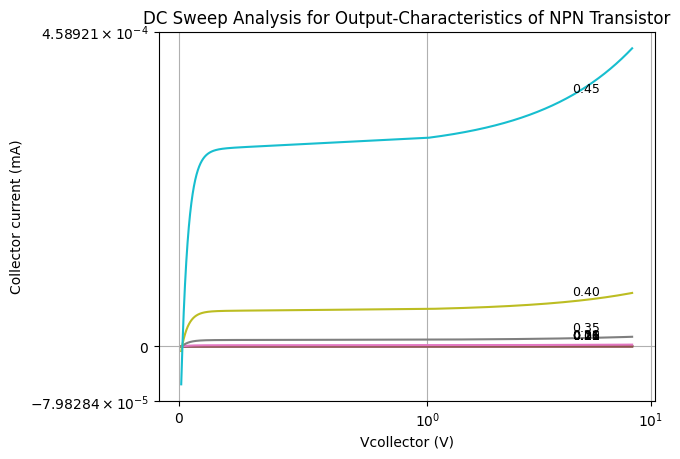

In [77]:
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import #




circuit = Circuit('IV_2n2222')

circuit.BJT('1', 'collector', 'base', circuit.gnd, model='2n2222a')

# .MODEL 2n2222a npn
circuit.model('2n2222a', 'BJT', IS=3.88184e-14, BF=929.846, NF=1.10496, VAF=16.5003,
IKF=0.019539, ISE=1.0168e-11, NE=1.94752, BR=48.4545,
NR=1.07004, VAR=40.538, IKR=0.19539, ISC=1.0168e-11,
NC=4, RB=0.1, IRB=0.1, RBM=0.1,
RE=0.0001, RC=0.426673, XTB=0.1, XTI=1,
EG=1.05, CJE=2.23677e-11, VJE=0.582701, MJE=0.63466,
TF=4.06711e-10, XTF=3.92912, VTF=17712.6, ITF=0.4334,
CJC=2.23943e-11, VJC=0.576146, MJC=0.632796, XCJC=1,
FC=0.170253, CJS=0, VJS=0.75, MJS=0.5,
TR=1e-07, PTF=0, KF=0, AF=1
                   )

# Define sweep parameters
VAF=16.5003
Vinput_start = 0.01
Vinput_stop = VAF#0.5
Vinput_step = 0.0001


circuit.V('measin', '1', 'base', 0)
circuit.V('output', '3', circuit.gnd, 5)
circuit.V('measout', '3', 'collector', 0)
Vbase=circuit.V('input', '1', circuit.gnd, 0.45)


# Base voltage values to iterate through
# Generate base voltages with exponential steps for the first part and linear steps for the second part
# exp_start = 0.01
# exp_stop = 0.41
lin_start = 0.01
lin_stop = 0.45

# Number of steps
#exp_steps = 20
lin_steps = 10

# Exponential part
#exp_base_voltages = np.geomspace(exp_start, exp_stop, num=exp_steps)

# Linear part
lin_base_voltages = np.linspace(lin_start, lin_stop, num=lin_steps)

# Combine both parts
#base_voltages = np.concatenate((exp_base_voltages, lin_base_voltages))
base_voltages = lin_base_voltages


#base_voltages = np.linspace(0.1, 0.5, num=20)  # Adjust 'num' as needed

# Store results for plotting
collector_voltages = []
collector_currents = []
labels = []

# Loop through base voltage values
for Vbase_value in base_voltages:
    Vbase.dc_value = Vbase_value
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.dc(Voutput=slice(Vinput_start, Vinput_stop, Vinput_step))
    waveform = analysis['collector']
    InputCurrentMeasurement = analysis['vmeasout']
    
    # Store results
    collector_voltages.append(np.array(waveform))
    collector_currents.append(InputCurrentMeasurement # 1000)  # Convert to mA
    labels.append(f'{Vbase_value:.2f}')  # Format to two decimal places for clarity


# Plot the results
plt.xscale('symlog', linthresh=1)
plt.yscale('symlog', linthresh=1)
for i in range(len(base_voltages)):
    plt.plot(collector_voltages[i], collector_currents[i], label=labels[i])
    # Annotate each curve with its label
    midpoint_index = len(collector_voltages[i]) // 2
    plt.annotate(labels[i], xy=(collector_voltages[i][midpoint_index], collector_currents[i][midpoint_index]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9, color='black')

plt.xlabel('Vcollector (V)')
plt.ylabel('Collector current (mA)')
plt.title('DC Sweep Analysis for Output-Characteristics of NPN Transistor')
plt.grid(True)
#plt.legend()
plt.show()


In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *

class ParallelResistor2(SubCircuit):
    __nodes__ = ('n1', 'n2')
    def __init__(self, name, R1=1@u_Ω, R2=2@u_Ω):
        SubCircuit.__init__(self, name, *self.__nodes__)
        self.R(1, 'n1', 'n2', R1)
        self.R(2, 'n1', 'n2', R2)

circuit = Circuit('Test')
circuit.subcircuit(ParallelResistor2('pr1', R2=2@u_Ω))
circuit.X('1', 'pr1', 1, circuit.gnd)
circuit.subcircuit(ParallelResistor2('pr2', R2=3@u_Ω))
circuit.X('2', 'pr2', 1, circuit.gnd)

print(circuit)

.title Test
.subckt pr1 n1 n2
R1 n1 n2 1Ohm
R2 n1 n2 2Ohm
.ends pr1

.subckt pr2 n1 n2
R1 n1 n2 1Ohm
R2 n1 n2 3Ohm
.ends pr2
X1 1 0 pr1
X2 1 0 pr2



In [27]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

import numpy as np


from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *

################

from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit, SubCircuit
from PySpice.Unit import *

     
#'noninvertinginput', 'invertinginput', 'positivepowersupply', 'negativepowersupply', 'output')
#1   2  99  50  28
class LM741(SubCircuit):
    __nodes__ = ('n1', 'n2', 'n99', 'n50', 'n28')

    def __init__(self, name):
        SubCircuit.__init__(self, name, *self.__nodes__)

        # Input Stage
        self.I('OS', 'n2', 'n1', 20@u_nA)
        self.R(1, 'n1', 'n3', 250@u_kΩ)
        self.R(2, 'n3', 'n2', 250@u_kΩ)
        self.I(1, 'n4', 'n50', 100@u_uA)
        self.R(3, 'n5', 'n99', 517@u_Ω)
        self.R(4, 'n6', 'n99', 517@u_Ω)
        self.Q(1, 'n5', 'n2', 'n4', model='QX')
        self.Q(2, 'n6', 'n7', 'n4', model='QX')
        self.C(4, 'n5', 'n6', 60.3614@u_pF)

        # Common Mode Effect
        self.I(2, 'n99', 'n50', 1.6@u_mA)
        # Use a behavioral voltage source to model the polynomial relationship
        self.B('OS', 'n7', 'n1', voltage_expression='1e-3 * (V(16) - V(49)) + 1')

        #self.V('OS', 'n7', 'n1', model='POLY', parameters=(1, 16, 49, 1e-3, 1))
        self.R(8, 'n99', 'n49', 40@u_kΩ)
        self.R(9, 'n49', 'n50', 40@u_kΩ)

        # Output Voltage Limiting
        self.V(2, 'n99', 'n8', 1.63)
        self.D(1, 'n9', 'n8', model='DX')
        self.D(2, 'n10', 'n9', model='DX')
        self.V(3, 'n10', 'n50', 1.63)

        # Second Stage
        self.E('H', 'n99', 'n98', 'n99', 'n49', 1)
        self.G(1, 'n98', 'n9', 'n5', 'n6', 2.1e-3)
        self.R(5, 'n98', 'n9', 95.493@u_MΩ)
        self.C(3, 'n98', 'n9', 333.33@u_pF)

        # Pole Stage
        self.G(3, 'n98', 'n15', 'n9', 'n49', 1e-6)
        self.R(12, 'n98', 'n15', 1@u_MΩ)
        self.C(5, 'n98', 'n15', 5.3052@u_fF)

        # Common-Mode Zero Stage
        self.G(4, 'n98', 'n16', 'n3', 'n49', 3.1623e-8)
        self.L(2, 'n98', 'n17', 530.5@u_mH)
        self.R(13, 'n17', 'n16', 1@u_kΩ)

        # Output Stage
        self.F(6, 'n50', 'n99', 'POLY', 'V6', 450@u_uA, 1)
        self.E(1, 'n99', 'n23', 'n99', 'n15', 1)
        self.R(16, 'n24', 'n23', 25@u_Ω)
        self.D(5, 'n26', 'n24', model='DX')
        self.V(6, 'n26', 'n22', 0.65)
        self.R(17, 'n23', 'n25', 25@u_Ω)
        self.D(6, 'n25', 'n27', model='DX')
        self.V(7, 'n22', 'n27', 0.65)
        self.V(5, 'n22', 'n21', 0.18)
        self.D(4, 'n21', 'n15', model='DX')
        self.V(4, 'n20', 'n22', 0.18)
        self.D(3, 'n15', 'n20', model='DX')
        self.L(3, 'n22', 'n28', 100@u_pH)
        self.RL(3, 'n22', 'n28', 100@u_kΩ)

################

# Example usage in a circuit
circuit = Circuit('LM741 Test Circuit')
circuit.V('PositivePole', '3', circuit.gnd, 12)
circuit.V('NegtivePole', '4', circuit.gnd, -12)
circuit.V('Inverting', '2', circuit.gnd, 1E-12)
circuit.R(1, 5, circuit.gnd, 2@u_kΩ)

# Instantiate and connect the LM741 subcircuit
circuit.X('LM741', 'LM741', '1', '2', '3', '4', '5')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
#analysis = simulator.operating_point()